In [68]:
from torch_geometric.datasets import Planetoid
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
#import matplotlib.pyplot as plt
import pylab as plt
import pickle
import sys
import numpy as np
from scipy import interpolate

from GNM_Toolbox.data.dataloader import *

[  0.  50. 100. 150. 200. 250. 300. 350. 100.] ['0.0', '50.0', '(100.0)', '150.0', '200.0', '250.0', '300.0', '350.0', '(100.0)']


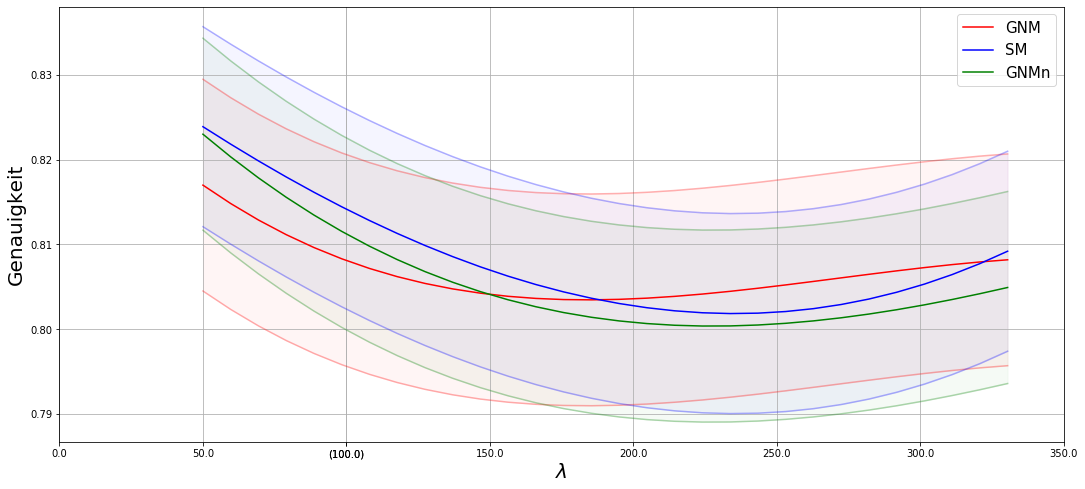

In [63]:
all_models = pickle_read('algorithm-analysis-cora-7.pkl')
all_models0 = dict()
all_models_times = dict()
for key in all_models.keys():
    models = all_models[key]
    if key == 'sm':
        all_models0[key] = np.array(models)
    else:
        models2 = list()
        models_time = list()
        for model in models:
            models2.append(np.array(model)[:2])
            models_time.append(model[2])
            
        all_models0[key] = np.array(models2)
        all_models_times[key] = np.array(models_time)

for key in all_models_times:
    times = all_models_times[key]
    #print('{}: mean={} var={}'.format(key, np.mean(times), np.var(times)))
all_models = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}
plot_data_old(all_models, ['red', 'blue', 'green'])

In [61]:
def standard_error(l, mean):
    # l: list of floats, 
    # mean: float
    return np.sqrt(np.mean((l-mean)**2))

def plot_data_old(all_models, colors, label_mean = 100):
    names = list(all_models.keys())
    M = len(names)
    fig = plt.figure(None, (18, 8))
    
    for name, color in zip(names, colors):
        # print point cloud
        data = np.array(all_models[name]).T
        #plt.plot(*data, 'x', alpha = 1, color=color)
        
        # print mean function
        lambdas = data[0]
        values = data[1]
        mini = np.min(lambdas)
        maxi = np.max(lambdas)
        width = (maxi-mini)/100
        xn = np.linspace(mini, maxi, 30)
        yn_mean = np.zeros_like(xn)
        yn_std = np.zeros_like(xn)
        for i in range(len(xn)):
            ys = list()
            # Find all values in given interval [xn[i] +- width/2]
            for j in range(len(values)):
                if lambdas[j] <= xn[i] + width/2 and lambdas[j] >= xn[i] - width/2:
                    ys.append(values[j])
            ys = np.sort(ys)
            mean = np.mean(ys)
            ys_lower = [y for y in ys if y < mean]
            ys_upper = [y for y in ys if y > mean]
            
            yn_mean[i] = mean
            yn_std = np.std(ys)
            
            
        mean_spline = interpolate.UnivariateSpline(xn, yn_mean)
        var_upper_spline = interpolate.UnivariateSpline(xn, yn_mean + yn_std)
        var_lower_spline = interpolate.UnivariateSpline(xn, yn_mean - yn_std)
        mean_spline.set_smoothing_factor(0.01)
        var_upper_spline.set_smoothing_factor(0.01)
        var_lower_spline.set_smoothing_factor(0.01)
        
        #plt.plot(xn, yn_mean, color=color, label=name)
        plt.plot(xn, mean_spline(xn), color=color, label=name)
        plt.grid()
        plt.plot(xn, var_lower_spline(xn), alpha=0.3, color=color)
        plt.plot(xn, var_upper_spline(xn), alpha=0.3, color=color)
        plt.fill_between(xn, var_lower_spline(xn), var_upper_spline(xn), alpha=0.04, color=color)
    
    x_ticks, _ = plt.xticks()
    x_ticks = np.append(x_ticks,  label_mean)
    x_labels = list()
    for x in x_ticks:
        if x == label_mean:
            x_labels.append(r'({})'.format(str(x)))
        else:
            x_labels.append(str(x))
    print(x_ticks, [x for x in x_labels])
    plt.xticks(x_ticks, x_labels)
    
    plt.legend(fontsize=15)
    plt.xlabel(r'$\lambda$', fontsize=20)
    plt.ylabel(r'Genauigkeit', fontsize=20)

In [62]:
all_models0 = pickle_read('algorithm-analysis-citeseer-2.pkl')

all_models2 = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}

all_models = pickle_read('algorithm-analysis-citeseer-6.pkl')
all_models0 = dict()
all_models_times = dict()
for key in all_models.keys():
    models = all_models[key]
    if key == 'sm':
        all_models0[key] = np.array(models)
    else:
        models2 = list()
        models_time = list()
        for model in models:
            models2.append(np.array(model)[:2])
            models_time.append(model[2])
            
        all_models0[key] = np.array(models2)
        all_models_times[key] = np.array(models_time)

for key in all_models_times:
    times = all_models_times[key]
    #print('{}: mean={} var={}'.format(key, np.mean(times), np.var(times)))

all_models0 = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}

fig = plt.figure(None, (18, 8))
ax1, ax2 = fig.subplots(1, 2)#, sharey = True)
ax1.set_ylabel(r'Genauigkeit auf unbekannten Daten', fontsize=16)
ax1.set_title('Citeseer 2-class', fontsize=20)
ax2.set_title('Citeseer 6-class', fontsize=20)


plot_data(all_models0, ['red', 'blue', 'green'], ax2)
plot_data(all_models2, ['red', 'blue', 'green'], ax1)

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_data/algorithm-analysis-citeseer-6.pkl'

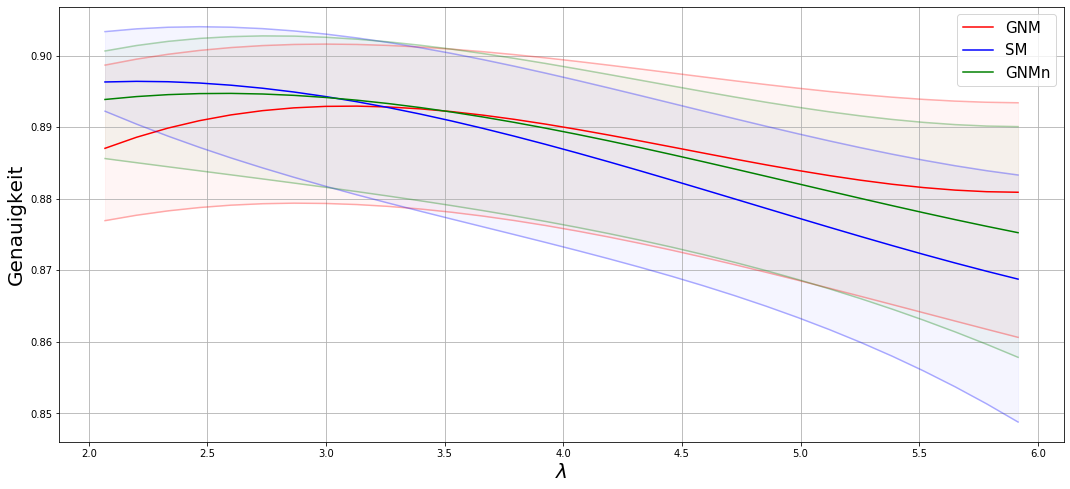

In [8]:
all_models0 = pickle_read('algorithm-analysis-citeseer-2.pkl')

all_models = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}
plot_data_old(all_models, ['red', 'blue', 'green'])

In [118]:
def var(l, mean):
    # l: list of floats, 
    # mean: float
    return np.mean((l-mean)**2)

def plot_data(all_models, colors, plt=plt, label_mean=2, label_std=2):
    names = list(all_models.keys())
    M = len(names)
    
    for name, color in zip(names, colors):
        # print point cloud
        data = np.array(all_models[name]).T
        if color == 'black':
            plt.plot(*data, 'x', alpha = 1, color=color)
        
        # print mean function
        lambdas = data[0]
        values = data[1]
        mini = np.min(lambdas)
        maxi = np.max(lambdas)
        width = (maxi-mini)/5
        xn = np.linspace(mini, maxi, 30)
        yn_mean = np.zeros_like(xn)
        yn_std = np.zeros_like(xn)
        for i in range(len(xn)):
            ys = list()
            # Find all values in given interval [xn[i] +- width/2]
            for j in range(len(values)):
                if lambdas[j] <= xn[i] + width/2 and lambdas[j] >= xn[i] - width/2:
                    ys.append(values[j])
            ys = np.sort(ys)
            mean = np.mean(ys)
            ys_lower = [y for y in ys if y < mean]
            ys_upper = [y for y in ys if y > mean]
            
            yn_mean[i] = mean
            yn_std[i] = np.std(ys)
            
            
        mean_spline = interpolate.UnivariateSpline(xn, yn_mean)
        var_upper_spline = interpolate.UnivariateSpline(xn, yn_mean + yn_std)
        var_lower_spline = interpolate.UnivariateSpline(xn, yn_mean - yn_std)
        mean_spline.set_smoothing_factor(0.001)
        var_upper_spline.set_smoothing_factor(0.001)
        var_lower_spline.set_smoothing_factor(0.001)
        
        #plt.plot(xn, yn_mean, color=color, label=name)
        plt.plot(xn, mean_spline(xn), color=color, label=name)
        plt.grid()
        plt.plot(xn, var_lower_spline(xn), alpha=0.3, color=color)
        plt.plot(xn, var_upper_spline(xn), alpha=0.3, color=color)
        plt.fill_between(xn, var_lower_spline(xn), var_upper_spline(xn), alpha=0.04, color=color)
    
    x_ticks = plt.get_xticks()
    xtickdiff = np.abs(x_ticks[0] - x_ticks[1])
    x_ticks = np.append(x_ticks,  label_mean)
    x_labels = list()
    new_xticks = list()
    for x in x_ticks:
        if x == label_mean:
            x_labels.append(r'({:.2f})'.format(x))
            new_xticks.append(x)
        elif np.abs(x - label_mean) >= xtickdiff/2:
            x_labels.append('{:.1f}'.format(x))
            new_xticks.append(x)
    plt.set_xticks(new_xticks)
    plt.set_xticklabels(x_labels)

    plt.legend(fontsize=15)
    plt.set_xlabel(r'$\lambda$', fontsize=20)
    #plt.set_ylabel(r'Genauigkeit', fontsize=20)

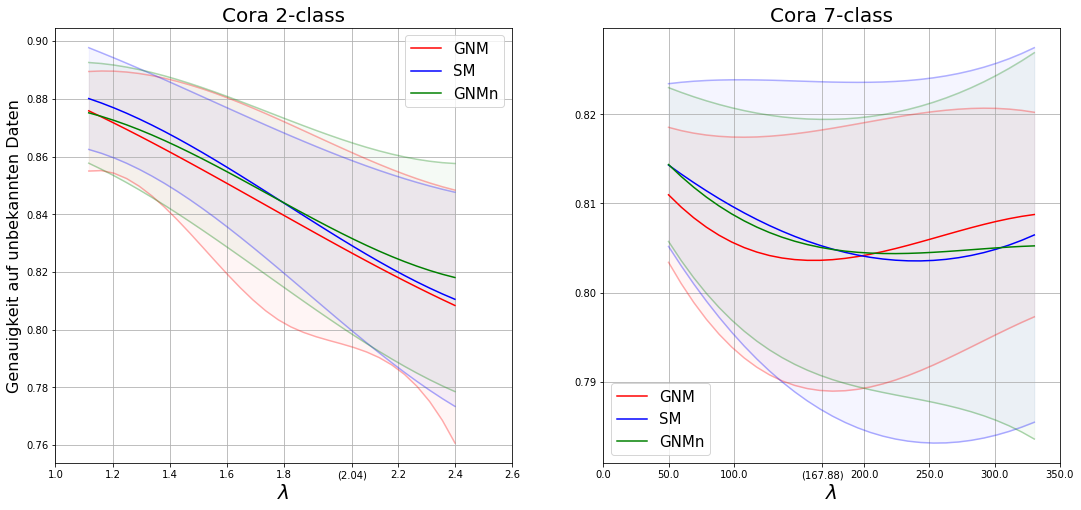

In [120]:
all_models0 = pickle_read('algorithm-analysis-cora0.pkl')
all_models0 = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}

all_models1 = pickle_read('algorithm-analysis-cora-7.pkl')
all_models1 = {'GNM': all_models1['gnm'], 'SM': all_models1['sm'], 'GNMn': all_models1['gnmi']}





fig = plt.figure(None, (18, 8))
ax1, ax2 = fig.subplots(1, 2)#, sharey = True)
ax1.set_ylabel(r'Genauigkeit auf unbekannten Daten', fontsize=16)
ax1.set_title('Cora 2-class', fontsize=20)
ax2.set_title('Cora 7-class', fontsize=20)
plot_data(all_models0, ['red', 'blue', 'green'], ax1, 2.038572741751474);
plot_data(all_models1, ['red', 'blue', 'green'], ax2, 167.88304081632654);

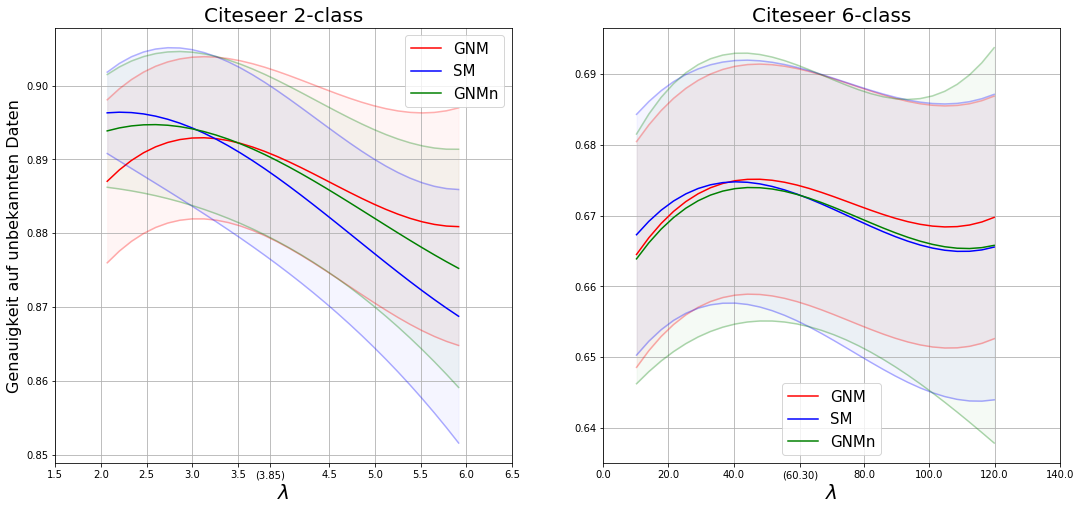

In [119]:
all_models0 = pickle_read('algorithm-analysis-citeseer-2.pkl')
all_models0 = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}

all_models1 = pickle_read('algorithm-analysis-citeseer-6.pkl')
all_models1 = {'GNM': all_models1['gnm'], 'SM': all_models1['sm'], 'GNMn': all_models1['gnmi']}





fig = plt.figure(None, (18, 8))
ax1, ax2 = fig.subplots(1, 2)#, sharey = True)
ax1.set_ylabel(r'Genauigkeit auf unbekannten Daten', fontsize=16)
ax1.set_title('Citeseer 2-class', fontsize=20)
ax2.set_title('Citeseer 6-class', fontsize=20)
plot_data(all_models0, ['red', 'blue', 'green'], ax1, 3.854339311);
plot_data(all_models1, ['red', 'blue', 'green'], ax2, 60.2997777);

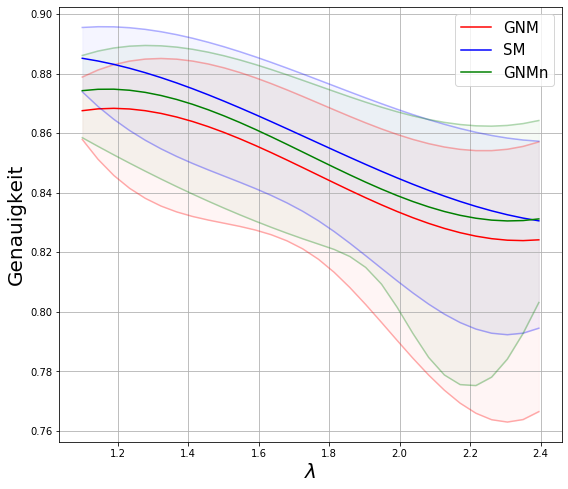

In [379]:
all_models0 = pickle_read('algorithm-analysis-cora.pkl')
all_models = {'GNM': all_models0['gnm'], 'SM': all_models0['sm'], 'GNMn': all_models0['gnmi']}
plot_data(all_models, ['red', 'blue', 'green'])